# ai4 for health related matters

## dependencies

In [40]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

## dataset stuff

### read the dataset

In [41]:
df = pd.read_csv('dataset.csv')
df = df.sample(frac = 1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
249,62,1,2,128,208,1,2,140,0,0.0,1,0.0,3.0,0
79,58,1,4,150,270,0,2,111,1,0.8,1,0.0,7.0,3
36,43,1,4,120,177,0,2,120,1,2.5,2,0.0,7.0,3
16,48,1,2,110,229,0,0,168,0,1.0,3,0.0,7.0,1
13,44,1,2,120,263,0,0,173,0,0.0,1,0.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,56,1,3,130,256,1,2,142,1,0.6,2,1.0,6.0,2
261,58,0,2,136,319,1,2,152,0,0.0,1,2.0,3.0,3
75,65,0,3,160,360,0,2,151,0,0.8,1,0.0,3.0,0
102,57,0,4,128,303,0,2,159,0,0.0,1,1.0,3.0,0


### train_test split

In [42]:
ratio = 0.9 # 90:10 train:test ratio
train_set = df.sample(frac=ratio)

# Dropping all those indexes from the dataframe that exists in the train_set
test_set = df.drop(train_set.index)
train_set.shape, test_set.shape

train_set
test_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
157,58,1,4,125,300,0,2,171,0,0.0,1,2.0,7.0,1
213,66,0,4,178,228,1,0,165,1,1.0,2,2.0,7.0,3
219,59,1,4,138,271,0,2,182,0,0.0,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
27,66,0,1,150,226,0,0,114,0,2.6,3,0.0,3.0,0
100,45,1,4,115,260,0,2,185,0,0.0,1,0.0,3.0,0
34,44,1,3,130,233,0,0,179,1,0.4,1,0.0,3.0,0
262,60,0,1,150,240,0,0,171,0,0.9,1,0.0,3.0,0
225,34,0,2,118,210,0,0,192,0,0.7,1,0.0,3.0,0
276,66,0,3,146,278,0,2,152,0,0.0,2,1.0,3.0,0


### formating

In [43]:
# import training dataset

# Clean column names
train_set.columns = train_set.columns.str.strip()

# Handle missing values represented by '?'
train_set = train_set.replace('?', np.nan)

# Convert columns to numeric, drop rows with NaNs
train_set = train_set.dropna()
train_set = train_set.astype(float)

# Split features and labels
X = train_set.drop("diagnosis", axis=1)
y = train_set["diagnosis"]

y = (y > 0.5).astype(float)  # Ensures only 0 or 1

# normalise featuress from minmax scaling (sklearn)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
inputs = torch.tensor(X_scaled, dtype=torch.float32)
targets = torch.tensor(y.values, dtype=torch.float32)

print(inputs.shape, targets.shape)

torch.Size([267, 13]) torch.Size([267])


In [44]:
# Clean column names
test_set.columns = test_set.columns.str.strip()

# Handle missing values represented by '?'
test_set = test_set.replace('?', np.nan)

# Convert columns to numeric, drop rows with NaNs
test_set = test_set.dropna()
test_set = test_set.astype(float)

# Split features and labels
X_test = test_set.drop("diagnosis", axis=1)
y_test = test_set["diagnosis"]
y_test = (y_test > 0.5).astype(float)  # Ensures only 0 or 1

# Use the same scaler as for training
X_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
test_tensor = torch.tensor(X_scaled, dtype=torch.float32)
test_target = torch.tensor(y_test.values, dtype=torch.float32)

print(test_tensor.shape, test_target.shape)

torch.Size([30, 13]) torch.Size([30])


## AI1

### setup/params

In [45]:
class SimpleNN(nn.Module): 
    def __init__(self): 
        super(SimpleNN, self).__init__() 
        self.fc1 = nn.Linear(13, 26)
        self.relu = nn.ReLU()
#        self.fc2 = nn.Linear(26, 32)
#        self.relu2 = nn.ReLU()
#        self.fc3 = nn.Linear(32, 26)
#        self.relu3 = nn.ReLU()
#        self.fc4 = nn.Linear(26, 1) #output layer
        self.fc2 = nn.Linear(26, 1)
        
    def forward(self, x): 
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
#        x = self.relu2(x)
#        x = self.fc3(x)
#        x = self.relu3(x)
#        x = self.fc4(x)
        return x  # No sigmoid here; use BCEWithLogitsLoss

model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=13, out_features=26, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=26, out_features=1, bias=True)
)


### error calcs.

In [46]:
#calculate error
# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimiser = optim.SGD(model.parameters(), lr=0.01)

# Ensure targets are shape (N, 1)
targets = targets.view(-1, 1)
print(targets)

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
      

### training

In [47]:
# learning rate and epochs
epochs = 10000
lr = 0.005

Epoch [1/10000], Loss: 0.6769
Epoch [2/10000], Loss: 0.6767
Epoch [3/10000], Loss: 0.6765
Epoch [4/10000], Loss: 0.6762
Epoch [5/10000], Loss: 0.6760
Epoch [6/10000], Loss: 0.6757
Epoch [7/10000], Loss: 0.6755
Epoch [8/10000], Loss: 0.6752
Epoch [9/10000], Loss: 0.6750
Epoch [10/10000], Loss: 0.6747
Epoch [11/10000], Loss: 0.6745
Epoch [12/10000], Loss: 0.6743
Epoch [13/10000], Loss: 0.6740
Epoch [14/10000], Loss: 0.6738
Epoch [15/10000], Loss: 0.6735
Epoch [16/10000], Loss: 0.6733
Epoch [17/10000], Loss: 0.6731
Epoch [18/10000], Loss: 0.6728
Epoch [19/10000], Loss: 0.6726
Epoch [20/10000], Loss: 0.6724
Epoch [21/10000], Loss: 0.6721
Epoch [22/10000], Loss: 0.6719
Epoch [23/10000], Loss: 0.6717
Epoch [24/10000], Loss: 0.6714
Epoch [25/10000], Loss: 0.6712
Epoch [26/10000], Loss: 0.6710
Epoch [27/10000], Loss: 0.6708
Epoch [28/10000], Loss: 0.6705
Epoch [29/10000], Loss: 0.6703
Epoch [30/10000], Loss: 0.6701
Epoch [31/10000], Loss: 0.6699
Epoch [32/10000], Loss: 0.6696
Epoch [33/10000],

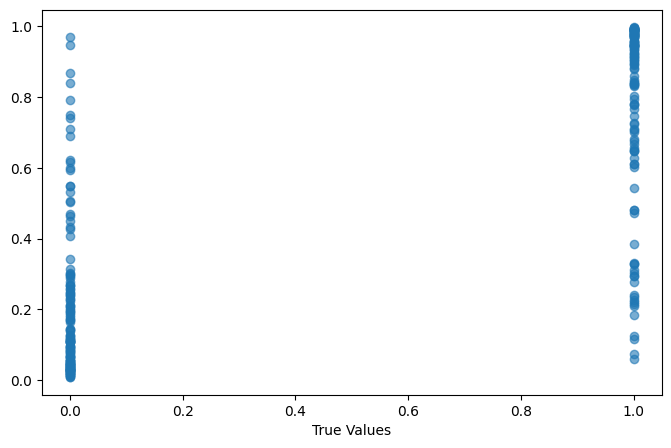

In [48]:
for epoch in range(epochs):
    optimiser.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    if torch.isnan(loss):
        print("Loss is NaN!")
        break
    loss.backward()
    optimiser.step()
#    if (epoch + 1) % 500 == 0:
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
print(outputs)

# Evaluate on training set
with torch.no_grad():
    outputs = model(inputs)
    preds = torch.sigmoid(outputs)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == targets).float().mean()
    print(f"Training Accuracy: {accuracy.item()*100:.2f}%")

    # Plot predictions vs. true values
    plt.figure(figsize=(8, 5))
    plt.scatter(targets.numpy(), preds.numpy(), alpha=0.6)
    plt.xlabel("True Values")

### testing

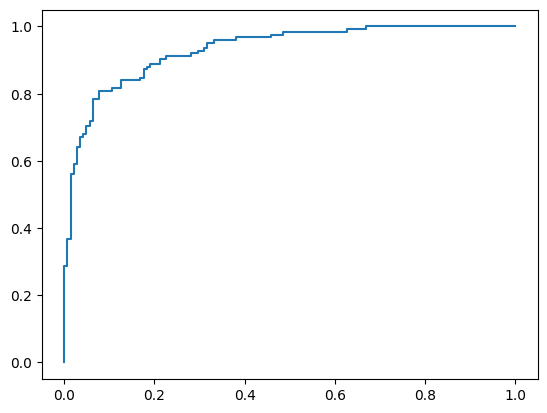

In [49]:
# roc curve
fpr1, tpr1, _ = roc_curve(targets.numpy(), preds.numpy())
plt.plot(fpr1, tpr1, label = "ROC Curve")

## UI